## ICARUS Test Pulse System
The ICARUS exeriment has two configurations for injecting test pulses onto the preamplifiers. The internal method of injecting test pulses relies on an internal square wave pulse (frequency = 2 kHz, duty cycle = 50%) with a configurable amplitude (20 mVpp, 150 mVpp). The internal triggers must be enabled by setting a flag in the `icarustpc_standard.fcl` BoardReader FHiCL file in the DAQ. The internal test pulse is injected only on either the odd or even channels, though significant pickup noise is observed in the adjacent ones.

The external method of injecting test pulses requires a function generator to be connected to the test pulse LEMO input on the readout boards themselves and the BoardReader FHiCL to be set to accept external test pulses. This method is more versatile, but ultimately they are very similar.

In each case the test pulse goes through some shaping electronics that are approximately equivalent to a low-pass filter, a 1:10 voltage attenuator (0, 3.3 Vpp -> 0, 330 mVpp), and a differentiator. This introduces some features that we believe are not related to the electronics response.

### I. Setup
First we must import the relevant helper functions, set the path for the waveform data, and set the fragment ID. In this case, EW08 (fragment ID 4626) was used for the tests.

In [1]:
from test_pulse_utilities import average_pulse, average_waveform

path = '/Users/mueller/Downloads/waveforms/'
fragment = 4626 # EW08

### II. Average Waveforms
By aligning waveforms and calculating the average we can get a much cleaner image of what the test pulse waveform looks like. The frequencies for the internal and external cases are such that multiple periods of the wave are observed. The upward and downward edges of the square wave produce the positive and negative lobes of the signal due to the differentiator behavior of the circuit that lies between the input and the preamplifiers.

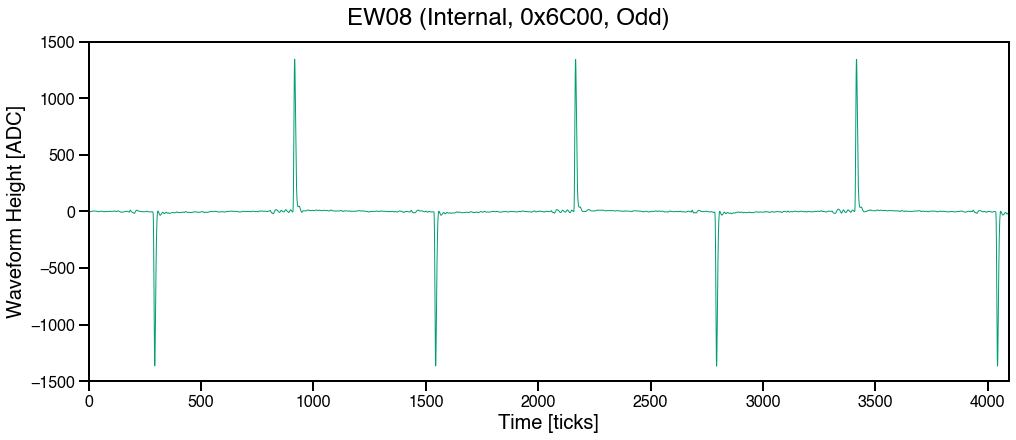

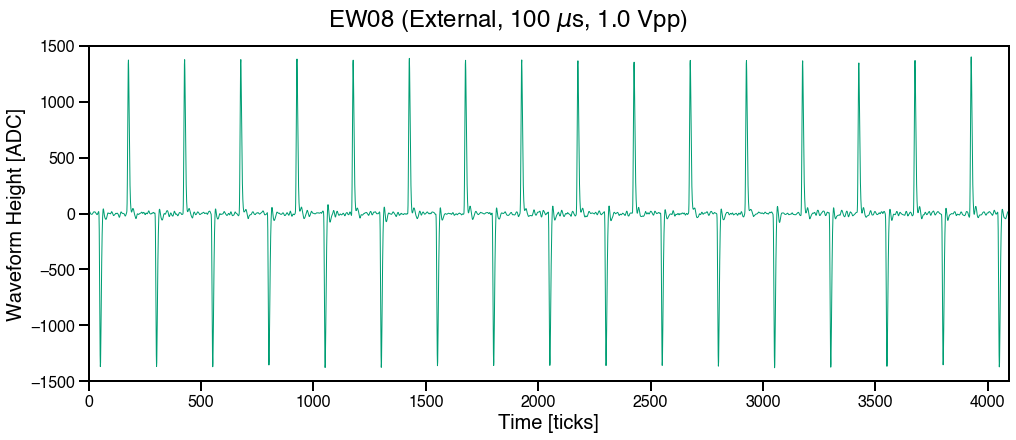

In [2]:
average_waveform(path, 9719, fragment, 513, 'EW08 (Internal, 0x6C00, Odd)', scale=1500, internal=True)
average_waveform(path, 10222, fragment, 0, 'EW08 (External, 100 $\mu$s, 1.0 Vpp)', scale=1500, internal=False)

We observe significant cross talk between adjacent channels, which can best be observed by looking at the non-pulsed channels in the internal test pulse results. Interestingly, the cross talk is itself bipolar and occurs on each downward or upwards edge of the input square wave. The shapes of the cross talk are somewhat different between downward and upwards edges, however.

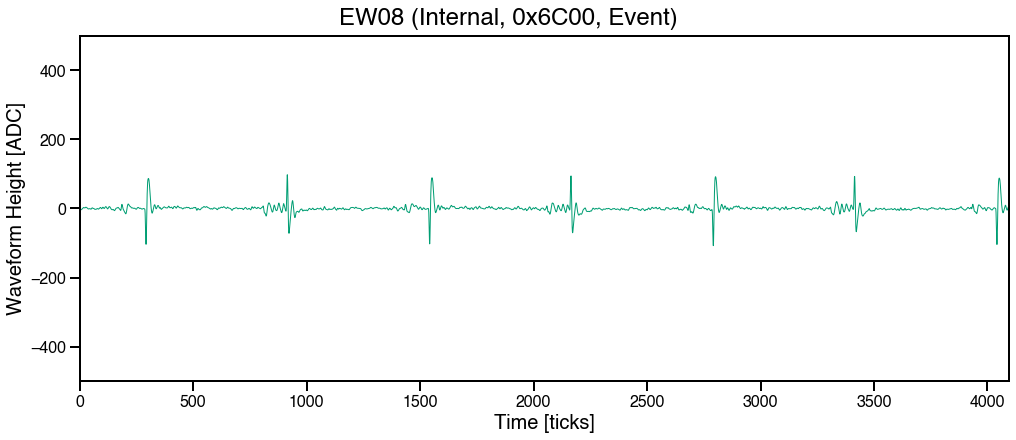

In [3]:
average_waveform(path, 9719, fragment, 512, 'EW08 (Internal, 0x6C00, Event)', scale=500, internal=True)

### III. Average Pulses
We can also study the pulses themselves in more detail by splitting the waveforms based on the period of the input signal and calculating the average of each resulting piece. The signal coherently adds whereas the noise sums to zero across a sufficiently large sample size. The upward and downward edges are theoretically quite similar, but in practice lead to slightly different pulse shapes due to the shaping electronics and the characteristics of the function generator. 

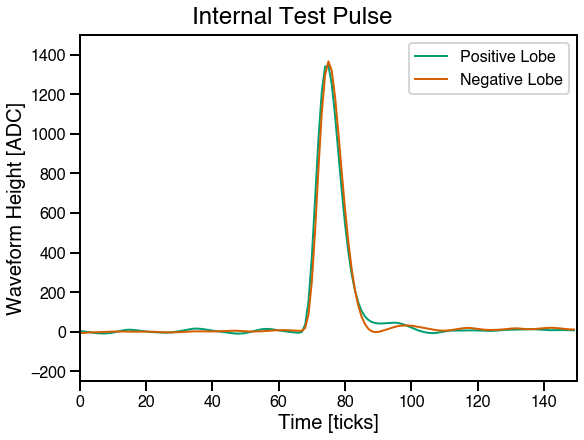

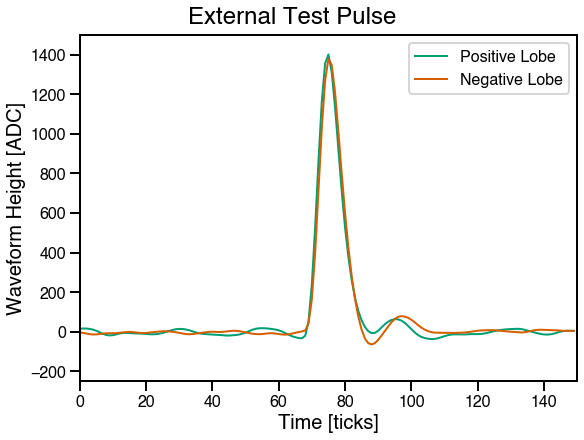

In [4]:
average_pulse(path, 9719, fragment, 513, 'Internal Test Pulse', scale=1500, internal=True)
average_pulse(path, 10222, fragment, 0, 'External Test Pulse', scale=1500, internal=False)

## IV. Run Documentation
For completeness, I will document here the list of runs taken with the test pulse (internal or external) enabled. In late March, we took data with the internal test pulse:
| Run   | Board   | Period [microseconds] | Amplitude [mVpp]    |
| ----- | ------- | --------------------- | ------------------- |
| 9718  | All     | 500                   | 44.375 + slot*2.031 |
| 9719  | All     | 500                   | 46.407 + slot*2.031 |

And the external test pulse runs (the ones used here) were performed on August 2:

| Run   | Board   | Period [microseconds] | Amplitude [mVpp] |
| ----- | ------- | --------------------- | ---------------- |
| 10214 | TT-Link | 50                    | 3300             |
| 10216 | Board 0 | 50                    | 3300             |
| 10217 | Board 0 | 50                    | 2000             |
| 10218 | Board 0 | 25                    | 3300             |
| 10219 | Board 0 | 10                    | 3300             |
| 10220 | Board 0 | 10                    | 330              |
| 10221 | Board 0 | 100                   | 330              |
| 10222 | Board 0 | 100                   | 1000             |
| 10223 | Board 0 | 100                   | 1000             |
